ValueError: 'xerr' (shape: (2, 1, 2)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'x' (shape: (1,))

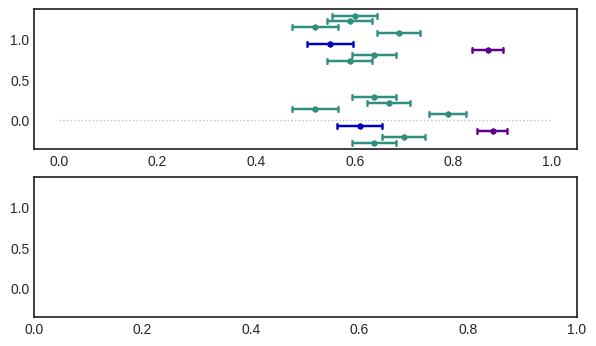

In [164]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

plt.style.use("seaborn-v0_8-white")
# Sample data


# Order
DATA = {
    "GPT-4": {
        "products - desc.": {
            "Humans": [],
            "LLMs": [0.88, 0.61, 0.79, 0.52, 0.67, 0.64, 0.70, 0.64],
            "LLM-samples": 440,
        },
        "products - list.": {
            "Humans": [0.28],
            "Humans-samples": 800,  ## TODO: Made-up number
            "LLMs": [0.87, 0.55, 0.69, 0.52, 0.59, 0.60, 0.64, 0.59],
            "LLM-samples": 440,
        },
        "papers": {
            "Humans": [0.60],
            "Humans-samples": 500,  ## TODO: Made-up number
            "LLMs": [0.60, 0.52, 0.67, 0.50, 0.61, 0.64, 0.55, 0.54],
            "LLM-samples": 744 / 2,
        },
    },
    "GPT-3.5": {
        "products - desc.": {
            "Humans": [],
            "LLMs": [0.89, 0.74, 0.95, 0.53, 0.84, 0.83, 0.84, 0.89],
            "LLM-samples": 440,
        },
        "products - list.": {
            "Humans": [0.29],
            "Humans-samples": 800,  ## TODO: Made-up number
            "LLMs": [0.90, 0.70, 0.96, 0.56, 0.82, 0.86, 0.86, 0.79],
            "LLM-samples": 440,
        },
        "papers": {
            "Humans": [0.46],
            "Humans-samples": 500,  ## TODO: Made-up number
            "LLMs": [0.77, 0.70, 0.82, 0.52, 0.71, 0.79, 0.73, 0.82],
            "LLM-samples": 664 / 2,
        },
    },
}


MODELS = [
    "GPT-4",
    "GPT-3.5",
    "Mixtral-8x22B",
    "Qwen1.5-4B",
    "Qwen1.5-14B",
    "Qwen1.5-72B",
    "Llama-3-8b",
    "Llama-3-70b",
]
K = len(MODELS)
COLS = ["#600090", "#0000c0"] + ["#309080"] * 6
MODEL_LABELS = [
    "GPT-4",
    "GPT-3.5",
    "Other LLMs",
    "Other LLMs",
    "Other LLMs",
    "Other LLMs",
    "Other LLMs",
    "Other LLMs",
]
COL_H = "#e05000"

MODELS_OFFSET = [-2, -1, 1, 2, 3, 4, -3, -4]


fig, axs = plt.subplots(nrows=2, sharey=True, figsize=(7, 4))

# Plotting the data
for i, (gen_m, d) in enumerate(DATA.items()):
    ax = axs[i]
    for j, (cat, d2) in enumerate(d.items()):
        for k, v in enumerate(d2["LLMs"]):
            for k, v in enumerate(d2["LLMs"]):
                alpha = v * d2["LLM-samples"]
                beta_ = (1 - v) * d2["LLM-samples"]
                ci = beta.interval(0.95, alpha, beta_)
                y = j + 0.07 * (MODELS_OFFSET[k])
                col = f"{COLS[k]}b0"
                ax.errorbar(v, y, xerr=[[v - ci[0]], [ci[1] - v]], color=col, markersize=0, capsize=2)
                ax.plot(v, y, "o", color=col, label=MODEL_LABELS[k], markersize=3)
        for k, v in enumerate(d2["Humans"]):
            alpha = v * d2["Humans-samples"]
            beta_ = (1 - v) * d2["Humans-samples"]
            ci = beta.interval(0.95, alpha, beta_)
            col = f"{COL_H}b0"
            ax.errorbar(v, j, xerr=[[v - ci[0]], [ci[1] - v]], color=col, markersize=0, capsize=2)
            ax.plot(v, j, "o", color=col, label="Humans", markersize=4)
        ax.hlines(j, 0, 1, color="#00000040", linestyles="dotted", lw=1)

    # Customizing the plot
    ax.set_yticks(range(len(d)))
    ax.set_yticklabels(d.keys())
    ax.vlines(0.5, -0.6, 2.6, color="#00000030", linestyles="dotted", lw=1)
    #ax.hlines([0.5, 1.5], 0, 1, color="#00000030", lw=1, )
    ax.set_xlim(0, 1)
    
    if i == 0:
        pass
        # ax.legend()
    else:
        ax.set_xlabel("Preference for LLM-generated content")

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.text(-0.31, 1, gen_m, va="center", ha="center", rotation="vertical")
    ax.tick_params(
        axis="y", pad=10
    )  # Increase the space between the y-axis ticks and labels


handles, labels = axs[1].get_legend_handles_labels()
hds = dict(zip(labels, handles))
lbs = ["Humans", "GPT-4", "GPT-3.5", "Other LLMs"]
legend = fig.legend(
    [hds[i] for i in lbs],
    lbs,
    loc="center",
    bbox_to_anchor=(0.5, 0.55),
    ncol=len(lbs),
    frameon=True,
)
legend.get_frame().set_edgecolor("gray")
legend.get_frame().set_linewidth(1)
legend.get_frame().set_alpha(0.5)
axs[0].set_xticks([])
axs[1].set_xticks([0.0, 0.25, 0.5, 0.75, 1.0])
# fig.set_title('Preference for LLM-gen across different models and categories')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig("results.pdf", dpi=600, bbox_inches="tight")
plt.show()

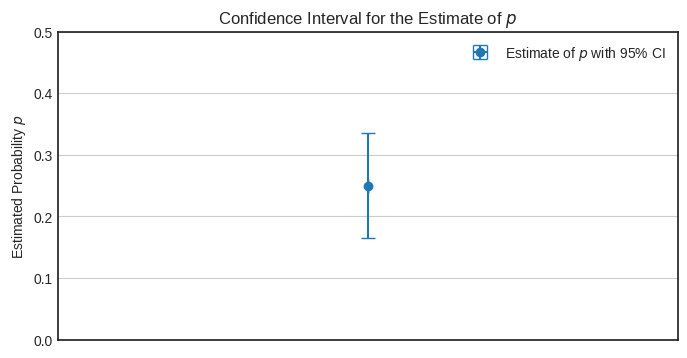

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
N = 100  # number of trials
X = 25   # number of successes
p_hat = X / N  # estimate of probability p
SE = np.sqrt(p_hat * (1 - p_hat) / N)  # standard error

# Calculate 95% confidence interval
confidence_interval = [p_hat - 1.96 * SE, p_hat + 1.96 * SE]

# Create the plot
plt.figure(figsize=(8, 4))
plt.errorbar(x=1, y=p_hat, xerr=0, yerr=[[p_hat - confidence_interval[0]], [confidence_interval[1] - p_hat]],
             fmt='o', label='Estimate of $p$ with 95% CI', capsize=5)
plt.xlim(0.5, 1.5)
plt.ylim(0, 0.5)
plt.xticks([])
plt.yticks(np.arange(0, 0.6, 0.1))
plt.ylabel('Estimated Probability $p$')
plt.title('Confidence Interval for the Estimate of $p$')
plt.legend()
plt.grid(True)
plt.show()